**Block 1: Import necessary libraries**

In [30]:
from google.colab import files

uploaded = files.upload()

Saving wdbc.data to wdbc (1).data


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

**Block 2: Load dataset**

In [33]:
# Load a dataset for training
names_of_columns = ["ID", "DIAGNOSES", "RADIUS_MEAN", "TEXTURE_MEAN", "PERIMETER_MEAN", "AREA_MEAN", "SMOOTHNESS_MEAN",
                "COMPACTNESS_MEAN", "CONCAVITY_MEAN", "CONCAVE_POINTS_MEAN", "SYMMETRY_MEAN", "FRACTAL_DIMESION_MEAN",
                "RADIUS_SE", "TEXTURE_SE", "PERIMETER_SE", "AREA_SE", "SMOOTHNESS_SE", "COMPACTNESS_SE", "CONCAVITY_SE",
                "CONCAVE_POINTS_SE", "SYMMETRY_SE", "FRACTAL_DIMESION_SE", "RADIUS_WORST", "TEXTURE_WORST",
                "PERIMETER_WORST", "AREA_WORST", "SMOOTHNESS_WORST", "COMPACTNESS_WORST", "CONCAVITY_WORST",
                "CONCAVE_POINTS_WORST", "SYMMETRY_WORST", "FRACTAL_DIMESION_WORST"]
df = pd.read_csv("wdbc.data", names=names_of_columns)
df.head(9)

,ID,DIAGNOSES,RADIUS_MEAN,TEXTURE_MEAN,PERIMETER_MEAN,AREA_MEAN,SMOOTHNESS_MEAN,COMPACTNESS_MEAN,CONCAVITY_MEAN,CONCAVE_POINTS_MEAN,...,RADIUS_WORST,TEXTURE_WORST,PERIMETER_WORST,AREA_WORST,SMOOTHNESS_WORST,COMPACTNESS_WORST,CONCAVITY_WORST,CONCAVE_POINTS_WORST,SYMMETRY_WORST,FRACTAL_DIMESION_WORST
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


**Block 3: Explore the data**

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      569 non-null    int64  
 1   DIAGNOSES               569 non-null    object 
 2   RADIUS_MEAN             569 non-null    float64
 3   TEXTURE_MEAN            569 non-null    float64
 4   PERIMETER_MEAN          569 non-null    float64
 5   AREA_MEAN               569 non-null    float64
 6   SMOOTHNESS_MEAN         569 non-null    float64
 7   COMPACTNESS_MEAN        569 non-null    float64
 8   CONCAVITY_MEAN          569 non-null    float64
 9   CONCAVE_POINTS_MEAN     569 non-null    float64
 10  SYMMETRY_MEAN           569 non-null    float64
 11  FRACTAL_DIMESION_MEAN   569 non-null    float64
 12  RADIUS_SE               569 non-null    float64
 13  TEXTURE_SE              569 non-null    float64
 14  PERIMETER_SE            569 non-null    fl

In [35]:
df.describe()

,ID,RADIUS_MEAN,TEXTURE_MEAN,PERIMETER_MEAN,AREA_MEAN,SMOOTHNESS_MEAN,COMPACTNESS_MEAN,CONCAVITY_MEAN,CONCAVE_POINTS_MEAN,SYMMETRY_MEAN,...,RADIUS_WORST,TEXTURE_WORST,PERIMETER_WORST,AREA_WORST,SMOOTHNESS_WORST,COMPACTNESS_WORST,CONCAVITY_WORST,CONCAVE_POINTS_WORST,SYMMETRY_WORST,FRACTAL_DIMESION_WORST
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [36]:
df.isnull().sum()

ID                        0
DIAGNOSES                 0
RADIUS_MEAN               0
TEXTURE_MEAN              0
PERIMETER_MEAN            0
AREA_MEAN                 0
SMOOTHNESS_MEAN           0
COMPACTNESS_MEAN          0
CONCAVITY_MEAN            0
CONCAVE_POINTS_MEAN       0
SYMMETRY_MEAN             0
FRACTAL_DIMESION_MEAN     0
RADIUS_SE                 0
TEXTURE_SE                0
PERIMETER_SE              0
AREA_SE                   0
SMOOTHNESS_SE             0
COMPACTNESS_SE            0
CONCAVITY_SE              0
CONCAVE_POINTS_SE         0
SYMMETRY_SE               0
FRACTAL_DIMESION_SE       0
RADIUS_WORST              0
TEXTURE_WORST             0
PERIMETER_WORST           0
AREA_WORST                0
SMOOTHNESS_WORST          0
COMPACTNESS_WORST         0
CONCAVITY_WORST           0
CONCAVE_POINTS_WORST      0
SYMMETRY_WORST            0
FRACTAL_DIMESION_WORST    0
dtype: int64

<Axes: xlabel='DIAGNOSES', ylabel='count'>

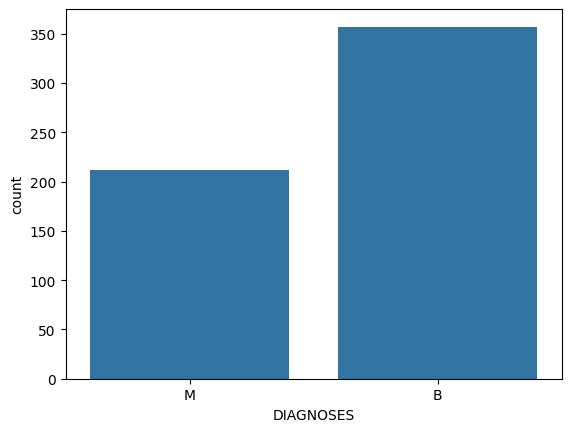

In [37]:
# WE HAVE TO SEARCH FOR THE TARGET VAR
sns.countplot(x=df['DIAGNOSES'])

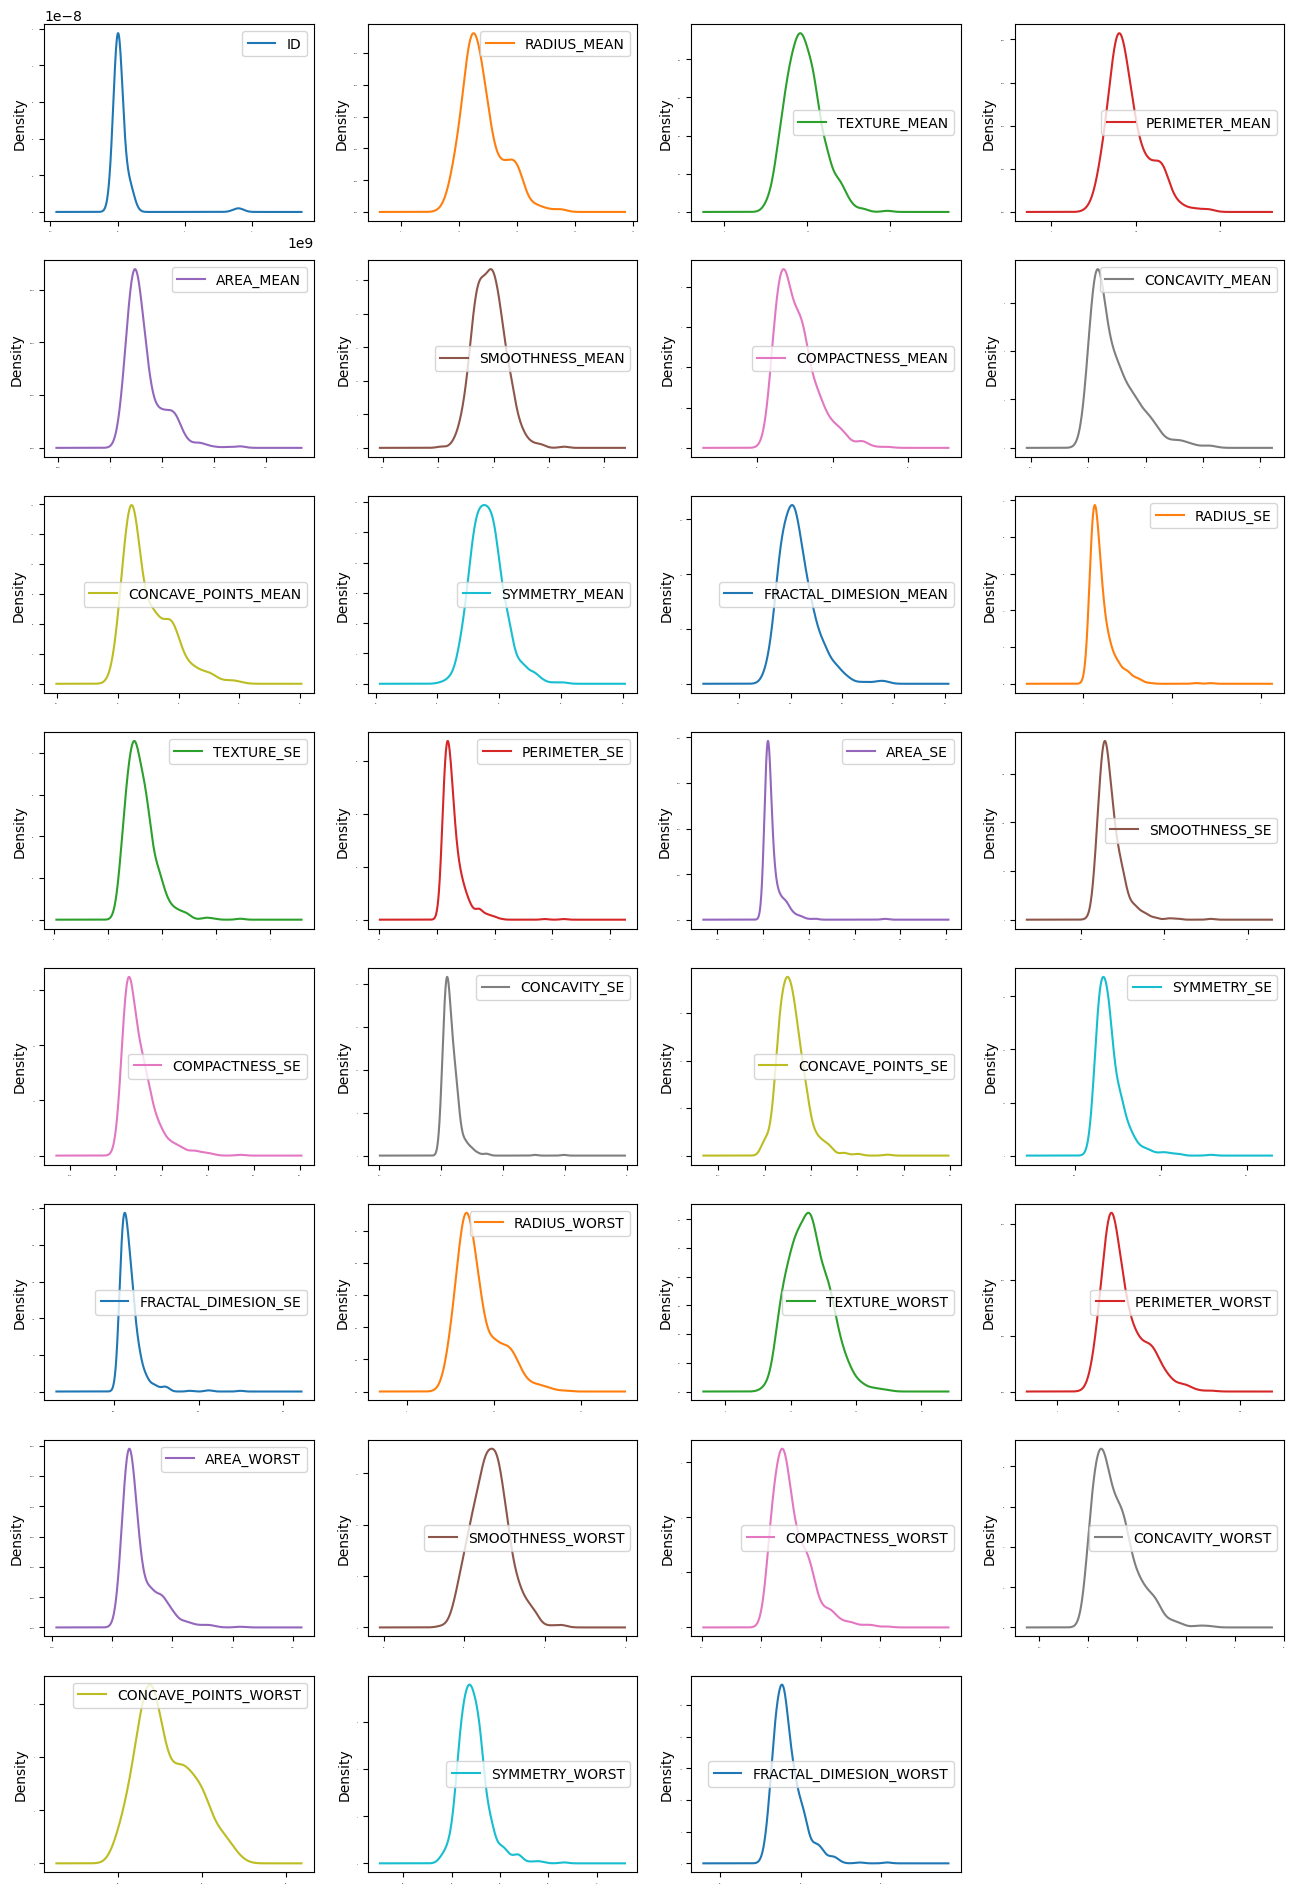

In [38]:
# we should check the distribution for numerical features in df where we will exclude DIAGNOSES
df.drop('DIAGNOSES', axis=1).plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True,
                                            fontsize=1, figsize=(16,24))
# Showcasing the plot as vice versa
plt.show()

**Block 4: Preprocess data**

In [39]:
# As we have to drop all the unnecessary columns so we will drop 'ID'
df = df.drop('ID', axis=1)

In [43]:
# we will have to convert 'DIAGNOSES to the respective binary labels (Malignant: 1, Benign: 0)
df['DIAGNOSES'] = df['DIAGNOSES'].map({'M': 1, 'B': 0})
# Split the dataset into features (X) and target variable (y)
X = df.drop("DIAGNOSES", axis=1)
y = df["DIAGNOSES"]

# we will split the data into {training + testing} sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


**Block 5: Choose an advanced machine learning model**

In [44]:
model = xgb.XGBClassifier()

**Block 6: Train the advanced machine learning model**

In [45]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**Block 7: Make predictions**

In [46]:
y_pred = model.predict(X_test)

**Block 8: Evaluate the model**

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"THE EXACT ACCURACY FOR THIS MODEL= {accuracy:.2f}")
print(f"THE EXACT PRECISION FOR THIS MODEL= {precision:.2f}")
print(f"THE EXACT RECALLING FOR THIS MODEL= {recall:.2f}")

THE EXACT ACCURACY FOR THIS MODEL= 0.96
THE EXACT PRECISION FOR THIS MODEL= 1.00
THE EXACT RECALLING FOR THIS MODEL= 0.90


**Block 9: Visualize results**

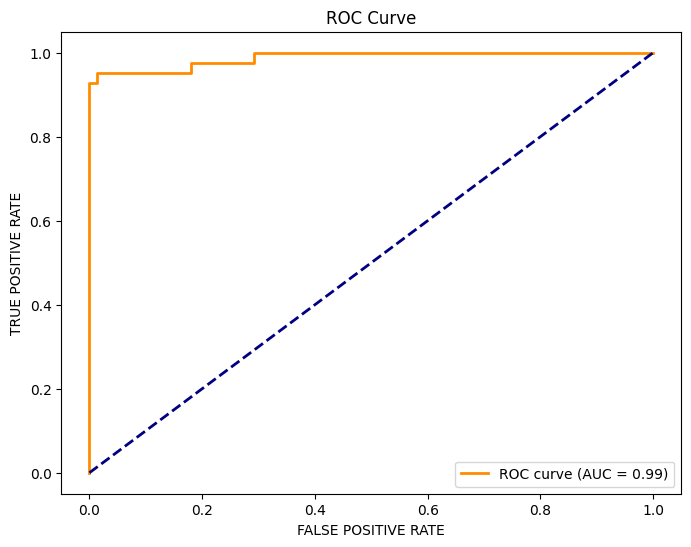

In [49]:
# to Visualize results, we will have to create a ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

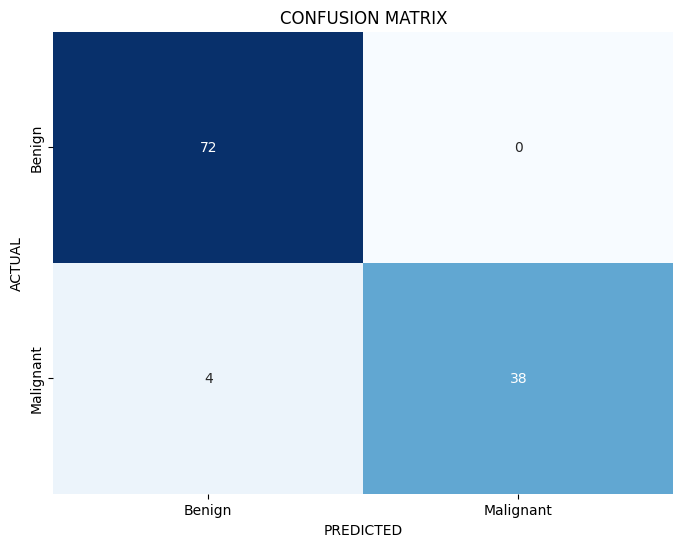

In [51]:
#if we want to display more detailed results, for that we will display the Ploting Confusion Matrix so that it gives a more detailed touch to our model
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.title('CONFUSION MATRIX')
plt.show()